In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Lab 2 : Web scraping and  API requests

In this lab exercise you will practice scraping data from a website, as well as doing some priliminary analysis on them.

__Deadline: Sunday, Oct 10 11:59__



## Part 1: Scraping Data From Wikipedia

We have completed a similar task during lecture. You have to scrap a specific page of Wikipedia and answer some questions regarding the data you have collected. 
You have to get the data about different countries and their respective populations from the following page:
[https://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population](https://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population)

This page contains multiple tables for past and future population of countries. For the first part of this lab do the following:

1. Fetch the data from wikipedia with "requests" library
2. Parse html data with BeautifulSoup library
3. Use BeautifulSoup to extract specific tables
4. Combine the tables and convert the data into a dictionary 
5. Make a pandas dataframe from the dictionary 
6. Answer some questions and do some basic visualization!



### 1.1 Get the data from wikipedia (5 pts)

Use "requests" library. 

In [ ]:
# Your code here 
import requests 
from bs4 import BeautifulSoup

url =requests.get('https://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population').text





### 1.2 Parse html data with BeautifulSoup

Parse the data using BeautifulSoup. Remember that BeautifulSoup has many useful attributes such as prettify(), find(attribute), and find_all(attribute). Check the documentation for more info: [https://www.crummy.com/software/BeautifulSoup/bs4/doc/](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)



#### 1.2.a Find the first title object and extract and print the string stored in it (5 pts)

In [ ]:
soup = BeautifulSoup(url, 'html.parser')
f_title=soup.find('title').string
print(f_title)



List of countries by past and projected future population - Wikipedia


#### 1.2.b Find all the paragrpahs, store them in a list, and print the first 10 (5 pts) 

In [ ]:
# Your code here  
par = soup.find_all("p")
f_ten = []
for i in range (10):
    f_ten.append(par[i].text)
print(f_ten)


['All the figures shown here have been sourced from the International Data Base (IDB) Division of the United States Census Bureau. Every individual value has been rounded to the nearest thousand, to assure data coherence, particularly when adding up (sub)totals. Although data from specific statistical offices may be more accurate, the information provided here has the advantage of being homogeneous.\n', 'Population estimates, as long as they are based on recent censuses, can be more easily projected into the near future than many macroeconomic indicators, such as GDP, which are much more sensitive to political and/or economic crises. This means that demographic estimates for the next five (or even ten) years can be more accurate than the projected evolution of GDP over the same time period (which may also be distorted by inflation).\n', 'However, no projected population figures can be considered exact. As the IDB states, "figures beyond the years 2020-2025 should be taken with caution"

### 1.3 Extract the tables (10 pts)

We only care about the tables that contain historical population data. Extract all of them.

In [ ]:
# Your code here  
# You need to  find all objects that include the css class “wikitable” within the soup object.

tables  = soup.find_all(class_="wikitable")

print(tables[0].prettify())




<table class="sortable wikitable" style="text-align: right">
 <tbody>
  <tr>
   <th>
    Country (or dependent territory)
   </th>
   <th>
    1950
   </th>
   <th>
    1955
   </th>
   <th>
    %
   </th>
   <th>
    1960
   </th>
   <th>
    %
   </th>
   <th>
    1965
   </th>
   <th>
    %
   </th>
   <th>
    1970
   </th>
   <th>
    %
   </th>
   <th>
    1975
   </th>
   <th>
    %
   </th>
   <th>
    1980
   </th>
   <th>
    %
   </th>
  </tr>
  <tr>
   <td align="left">
    <span class="flagicon">
     <img alt="" class="thumbborder" data-file-height="531" data-file-width="1063" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_the_Taliban.svg/23px-Flag_of_the_Taliban.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_the_Taliban.svg/35px-Flag_of_the_Taliban.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_the_Taliban.svg/46px-Flag_of_the_Taliban.svg.png 2x" width="23"/>
    </spa

In [ ]:
# check the tables you extracted

from IPython.core.display import display, HTML
display(HTML(tables[0].prettify()))

Country (or dependent territory),1950,1955,%,1960,%,1965,%,1970,%,1975,%,1980,%
Afghanistan,"8,151","8,892",1.76,"9,830",2.03,"10,998",2.27,"12,431",2.48,"14,133",2.60,"15,045",1.26
Albania,"1,228","1,393",2.56,"1,624",3.12,"1,884",3.02,"2,157",2.74,"2,402",2.17,"2,672",2.16
Algeria,"8,893","9,842",2.05,"10,910",2.08,"11,964",1.86,"13,932",3.09,"16,141",2.99,"18,807",3.10
American Samoa,20,20,0.72,21,0.20,25,4.23,28,2.08,30,1.68,33,1.81
Andorra,7,7,0.04,9,6.28,14,10.17,20,7.49,27,6.32,34,4.81
Angola,"4,118","4,424",1.44,"4,798",1.64,"5,135",1.37,"5,606",1.77,"6,051",1.54,"7,206",3.56
Anguilla,6,6,0.80,6,0.79,6,0.75,7,0.80,7,0.68,7,0.64
"<img alt="""" class=""thumbborder"" data-file-height=""460"" data-file-width=""690"" decoding=""async"" height=""15"" src=""//upload.wikimedia.org/wikipedia/commons/thumb/8/89/Flag_of_Antigua_and_Barbuda.svg/23px-Flag_of_Antigua_and_Barbuda.svg.png"" srcset=""//upload.wikimedia.org/wikipedia/commons/thumb/8/89/Flag_of_Antigua_and_Barbuda.svg/35px-Flag_of_Antigua_and_Barbuda.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/89/Flag_of_Antigua_and_Barbuda.svg/45px-Flag_of_Antigua_and_Barbuda.svg.png 2x"" width=""23""/> Antigua and Barbuda",46,52,2.19,55,1.32,60,1.70,66,2.05,69,0.73,69,0.15
Argentina,"17,151","18,928",1.99,"20,617",1.72,"22,284",1.57,"23,963",1.46,"26,082",1.71,"28,370",1.70
Armenia,"1,356","1,566",2.92,"1,869",3.61,"2,206",3.37,"2,520",2.70,"2,835",2.38,"3,134",2.03


### 1.4 Convert the tables into a dictionary  (35 pts)

Looking at the tables, we only care about the population number throughout the history. You want to associate each country with a series of population values to make a proper time series table you can use to analyze the population in a given coutnry.

First, you need to clean the tables cells from any footnote, links, commas or any garbage values. 
Once your data is cleaned, make a dictionary and combine each country with its corresponding year/population values across all three tables. An entry in your final dictionary should look like this: 


'Albania': {'1950': 1228,
            '1955': 1393,
            '1960': 1624,
            '1965': 1884,
            '1970': 2157,
            '1975': 2402,
            '1980': 2672,
            '1985': 2957,
            '1990': 3245,
            '1995': 3159,
            '2000': 3159,
            '2005': 3025,
            '2010': 2987,
            '2015': 3030,
            '2020': 3075,
            '2025': 3105,
            '2030': 3103,
            '2035': 3063,
            '2040': 2994,
            '2045': 2913,
            '2050': 2825},

One way to do it is:

1. First extract the header 
2. From your header only store values that are numeric (you can use isnumeric() function, recall that we only care about year values and we don't want to store columns represented by %
3. Once you have all the relevant column names (column that correspond to a year value), you can go over every row of the table 
    * Create a dictionary key with the country name 
    * Collect and add values corresponding to one of your column names to the dictionary

In [ ]:
# Your code here  
headers = soup.find_all('th')
c_headers = []
for i in range(len(headers)):
    if headers[i].text.isnumeric():
        c_headers.append(headers[i].text)

# Your code here  
headers = soup.find_all('th')
c_headers = []
for i in range(len(headers)):
    if headers[i].text.isnumeric():
        c_headers.append(headers[i].text)

#data list 
all_data = {}
inside_data = []
final_country_pop = []

#iterate thru every table

# to keep track of whether all the neccessary indices has been created from first table
# to prevent accessing wrong index
iterr = 0 
roww = 0
for table in tables:
    for row in table.find_all('tr')[1:]:
        c = [data for data in row.find_all('td')]
        c_pop1 = [x.string for x in [data for data in row.find_all('td')][1:]]
        c_pop1 = [x.replace(",","") for x in c_pop1 if  x!= None]
        c_pop1 = [x for x in c_pop1 if x.isdecimal() == True]
        if (iterr >= 1):
            final_country_pop[roww].extend(c_pop1)
        else:
            final_country_pop.append(c_pop1)
        all_data[c[0].find('a').string] = {}
        keys = list(all_data.keys())
        roww = roww + 1
    iterr = iterr + 1
    roww = 0

final_country_pop = final_country_pop

count = 0
for keys in list(all_data.keys()):
    for headers in range(len(c_headers)):
        
        all_data[keys][c_headers[headers]] = final_country_pop[count][headers]
    count = count + 1
all_data.pop('World')    
all_data


{'1950': '2557629',
 '1955': '2782099',
 '1960': '3043002',
 '1965': '3350426',
 '1970': '3712698',
 '1975': '4089084',
 '1980': '4451363',
 '1985': '4856463',
 '1990': '5288956',
 '1995': '5699203',
 '2000': '6088572',
 '2005': '6473045',
 '2010': '6866333',
 '2015': '7256491',
 '2020': '7643403',
 '2025': '8006581',
 '2030': '8340607',
 '2035': '8646305',
 '2040': '8925950',
 '2045': '9180226',
 '2050': '9408142'}

{'Afghanistan': {'1950': '8151',
  '1955': '8892',
  '1960': '9830',
  '1965': '10998',
  '1970': '12431',
  '1975': '14133',
  '1980': '15045',
  '1985': '13120',
  '1990': '13569',
  '1995': '19446',
  '2000': '22462',
  '2005': '26335',
  '2010': '29121',
  '2015': '32565',
  '2020': '36644',
  '2025': '41118',
  '2030': '45665',
  '2035': '50195',
  '2040': '54717',
  '2045': '59256',
  '2050': '63796'},
 'Albania': {'1950': '1228',
  '1955': '1393',
  '1960': '1624',
  '1965': '1884',
  '1970': '2157',
  '1975': '2402',
  '1980': '2672',
  '1985': '2957',
  '1990': '3245',
  '1995': '3159',
  '2000': '3159',
  '2005': '3025',
  '2010': '2987',
  '2015': '3030',
  '2020': '3075',
  '2025': '3105',
  '2030': '3103',
  '2035': '3063',
  '2040': '2994',
  '2045': '2913',
  '2050': '2825'},
 'Algeria': {'1950': '8893',
  '1955': '9842',
  '1960': '10910',
  '1965': '11964',
  '1970': '13932',
  '1975': '16141',
  '1980': '18807',
  '1985': '22009',
  '1990': '25191',
  '1995': '28322',

###  1.5 Create a dataframe from your dictionary (10 pts)

Now that all tables are stored in a dictionary, we can convert the dictionary into a pandas dataframe.

1. Remove the "World" row 
2. Replace 'NaN' values with 0
3. Display the first 8 rows


In [ ]:
import pandas as pd
df =pd.DataFrame(all_data)
df.head(8)

,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,Central African Republic,Chad,...,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
1950,8151,1228,8893,20,7,4118,6,46,17151,1356,50,8268,6936,2886,71,115,45646,211,7723,8640,66,1673,39,164,2767,2663,431,53444,7,45,7251,4377,2363,4472,4888,14012,147,7,1260,2608,...,2438,13596,20846,2707,28063,7534,6468,209,7015,4695,3496,7982,1531,7935,20042,436,1172,46,633,3518,21122,1205,6,5,5522,36775,72,50128,151869,27,2195,6293,53,5010,25349,7,10,4778,2554,2854
1955,8892,1393,9842,20,7,4424,6,52,18928,1566,54,9278,6947,3314,88,131,49589,228,7781,8869,77,1847,42,187,3075,2975,462,61652,7,61,7500,4615,2577,5049,5211,16051,170,7,1349,2806,...,2674,15369,21552,2757,29319,8694,7391,241,7263,4981,3938,9486,1781,8971,23452,473,1299,55,721,3847,24145,1348,6,5,6318,39369,83,50947,165070,28,2354,7233,59,6171,27739,8,16,5266,2870,3410
1960,9830,1624,10910,21,9,4798,6,55,20617,1869,58,10362,7048,3882,113,157,54593,233,8168,9119,92,2056,45,213,3435,3241,497,71412,8,84,7868,4866,2816,5762,5609,18267,197,8,1468,3043,...,2956,17417,24785,2809,30642,9914,8447,285,7481,5363,4531,11210,2081,10260,27513,509,1456,64,842,4150,28218,1585,6,6,7262,42645,104,52373,179980,33,2531,8532,67,7557,31657,8,28,5872,3255,4011
1965,10998,1884,11964,25,14,5135,6,60,22284,2206,60,11440,7271,4567,140,192,60285,235,8591,9449,107,2311,49,255,3854,3494,539,82602,9,103,8202,5032,3171,6602,6104,20072,232,9,1628,3345,...,3283,19899,28706,2862,32085,11261,9653,337,7734,5944,5323,12978,2511,11871,32062,554,1648,75,940,4566,31951,1883,6,6,8390,45235,144,54351,193527,44,2694,10206,75,9068,37259,9,50,6511,3695,4686
1970,12431,2157,13932,28,20,5606,7,66,23963,2520,60,12661,7468,5169,171,220,67332,239,9028,9638,123,2620,53,310,4347,3704,584,94931,10,128,8490,5304,3522,7395,6727,21750,269,11,1840,3728,...,3667,22740,32242,2915,33877,12619,11031,373,8043,6268,6253,14599,2939,13807,37091,598,1965,84,956,5099,35759,2182,6,6,9716,47236,250,55633,203985,64,2824,11941,86,10759,42577,9,90,7099,4241,5515
1975,14133,2402,16141,30,27,6051,7,69,26082,2835,60,13772,7579,5697,190,259,76153,248,9361,9795,136,2996,54,373,4915,3981,705,107328,11,157,8721,5674,3677,7500,7522,23210,281,15,2058,4145,...,4128,25816,35282,3396,35564,13780,12708,363,8193,6404,7398,16123,3449,16148,42273,677,2267,90,1007,5704,40530,2524,7,7,10761,48974,523,56216,215466,95,2844,13988,100,12675,48076,9,73,7935,4849,6342
1980,15045,2672,18807,33,34,7206,7,69,28370,3134,60,14616,7550,6199,210,348,87938,252,9644,9847,145,3459,55,447,5442,4093,901,121064,11,186,8844,6319,4298,6889,8756,24594,297,18,2349,4523,...,5794,29252,38125,4668,37489,15056,14784,355,8311,6386,8740,17849,3967,18654,47026,558,2626,92,1091,6444,45048,2876,8,8,12020,50047,1001,56315,227225,100,2931,15994,117,14768,53716,11,125,9133,5541,7170
1985,13120,2957,22009,39,45,8390,7,65,30672,3465,62,15696,7560,6846,229,424,102309,258,9982,9859,166,4031,57,530,5935,4227,1080,135734,14,218,8944,7171,4915,7842,10227,25942,317,21,2715,5067,...,6459,34255,40807,5320,38535,15848,17507,395,8357,6568,10479,19338,4569,21485,51759,649,3130,95,1190,7364,50989,3241,10,9,13811,50945,1364,56585,237924,101,3019,18216,135,16998,60094,14,180,10540,6536,8561


In [ ]:
# Your code here
list(df.index)

['1950',
 '1955',
 '1960',
 '1965',
 '1970',
 '1975',
 '1980',
 '1985',
 '1990',
 '1995',
 '2000',
 '2005',
 '2010',
 '2015',
 '2020',
 '2025',
 '2030',
 '2035',
 '2040',
 '2045',
 '2050']

##### Part 2. Exploring the data 

Now let's look at the data at hand. 

### 2.1 Plotting population  (15 pts)

Pick 6 countries of your choice and plot their population growth.

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Population')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

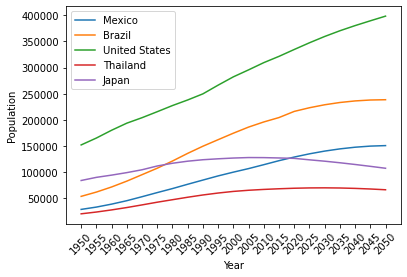

In [ ]:
# Your code here
#Mexico, US, Guatemala
import matplotlib.pyplot as plt
plt.xlabel('Year')
plt.ylabel('Population')
#first Country:
plt.xticks(rotation= 45)
plt.plot(df.index,df.iloc[:,df.columns.get_loc('Mexico')].astype(int), label = 'Mexico')
plt.plot(df.index,df.iloc[:,df.columns.get_loc('Brazil')].astype(int), label = 'Brazil')
plt.plot(df.index,df.iloc[:,df.columns.get_loc('United States')].astype(int), label = 'United States')
plt.plot(df.index,df.iloc[:,df.columns.get_loc('Thailand')].astype(int), label = 'Thailand')
plt.plot(df.index,df.iloc[:,df.columns.get_loc('Japan')].astype(int), label = 'Japan')
plt.legend()
plt.show()


### 2.2 Find 10 most populous countries ( 15 pts)

Find 10 most popoulous coutntries in 1960, 1980, 2000, 2020, and 2040. 
Plot and compare their population. 

Text(0.5, 1.0, 'Graph 1960')

Text(0.5, 0, 'Country')

Text(0, 0.5, 'Population')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

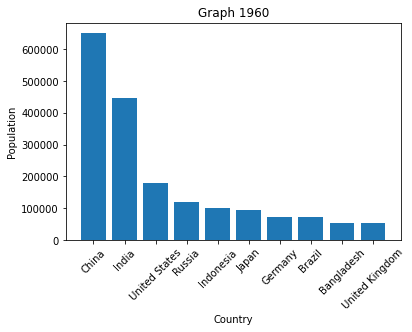

In [ ]:
# Your code here
#plot for 1960 
plt.title('Graph 1960')
plt.xlabel('Country')
plt.ylabel('Population')
row_1960 = df.loc['1960'].astype(int)
top = row_1960.nlargest(10)
plt.xticks(rotation= 45)
graph1 = plt.bar(top.keys(),top.iloc[0:,])




(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

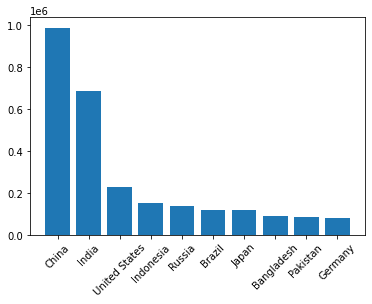

In [ ]:
#plot for 1980
plt.title('Graph 1980')
plt.xlabel('Country')
plt.ylabel('Population')
row_1980 = df.loc['1980'].astype(int)
top = row_1980.nlargest(10)
plt.xticks(rotation= 45)
graph2 = plt.bar(top.keys(),top.iloc[0:,])

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

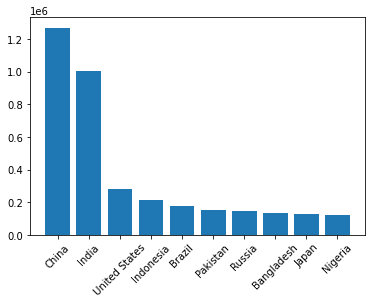

In [ ]:
#plot for 2000
plt.title('Graph 2000')
plt.xlabel('Country')
plt.ylabel('Population')
row_2000 = df.loc['2000'].astype(int)
top = row_2000.nlargest(10)
plt.xticks(rotation= 45)
graph1 = plt.bar(top.keys(),top.iloc[0:,])


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

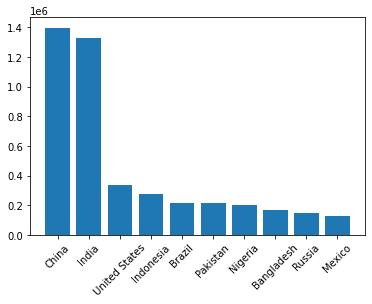

In [ ]:
#2020
plt.title('Graph 2020')
plt.xlabel('Country')
plt.ylabel('Population')
row_2020 = df.loc['2020'].astype(int)
top = row_2020.nlargest(10)
plt.xticks(rotation= 45)
graph1 = plt.bar(top.keys(),top.iloc[0:,])

Text(0.5, 1.0, 'Graph 2040')

Text(0.5, 0, 'Country')

Text(0, 0.5, 'Population')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

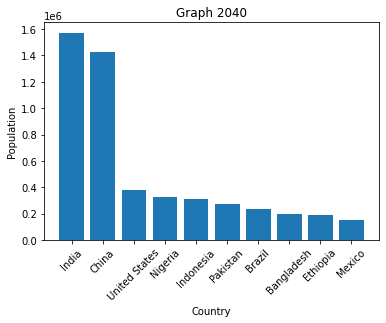

In [ ]:
#2040
plt.title('Graph 2040')
plt.xlabel('Country')
plt.ylabel('Population')
row_2040= df.loc['2040'].astype(int)
top = row_2040.nlargest(10)
plt.xticks(rotation= 45)
graph1 = plt.bar(top.keys(),top.iloc[0:,])